<!-- slide -->
# Exploratory Data Analysis (EDA) on IMDB Movie Ratings by Genre (2018-2019 vs 2021-2022)

## Introduction
The goal of this analysis is to explore how movie ratings vary across different genres during two specific time periods: 2018-2019 and 2021-2022. We will focus on:
<!-- fragment -->
- Average movie ratings per genre.
- Comparisons between the two periods.
- Observing trends in movie ratings and identifying genres that have improved or declined over time.

In [24]:
# fragment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<!-- slide -->
## Loading the Data

**a. title.basics dataset** :
Contains metadata for titles including genres, start years, and types of media (e.g., movies, TV shows).

**b. title.ratings dataset** :
Contains ratings (average ratings and the number of votes) for the titles.

In [26]:
# fragment
title_basics = pd.read_csv('title.basics.tsv.gz', sep='\t', dtype=str)
title_ratings = pd.read_csv('title.ratings.tsv.gz', sep='\t', dtype=str)

<!-- slide -->
## Data Preprocessing
**a. Filtering Movies** : 
We only want to work with movie data, so we filter out non-movie records.

In [28]:
# fragment
movies = title_basics[(title_basics['titleType'] == 'movie') & (title_basics['startYear'] != '\\N')].copy()
movies['startYear'] = pd.to_numeric(movies['startYear'], errors='coerce')
title_ratings['averageRating'] = pd.to_numeric(title_ratings['averageRating'], errors='coerce')

<!-- slide -->
**b. Merging Datasets** : 
We merge the title.basics and title.ratings datasets on the tconst identifier.

In [30]:
# fragment
merged_data = pd.merge(movies, title_ratings, on='tconst', how='inner')

<!-- slide -->
**c. Handling Genres** :
To analyze individual genres, we split the genre column to handle cases where a movie is listed under multiple genres.

In [32]:
# fragment
merged_data['genres'] = merged_data['genres'].str.split(',')
merged_data_exploded = merged_data.explode('genres')

<!-- slide -->
**d. Missing Values** : 
We examine the missing data to ensure that our analysis is not impacted by incomplete information.

In [34]:
# fragment
print("Missing values in title_basics:")
print(title_basics.isnull().sum())

Missing values in title_basics:
tconst              0
titleType           0
primaryTitle       19
originalTitle      19
isAdult             0
startYear           0
endYear             0
runtimeMinutes      0
genres            630
dtype: int64


<!-- fragment -->
- We clean the data by removing rows with missing genre values.

In [36]:
# fragment
merged_data_clean = merged_data.dropna(subset=['genres'])

## Analysis of IMDb Ratings Distribution(2018-2019 vs 2021-2022)

The pie charts below illustrate the distribution of IMDb ratings across four categories (0-4, 4-6, 6-8, and 8-10) for the periods 2018-2019 and 2021-2022. The breakdown shows how movies are rated across different score ranges in these two distinct time frames.

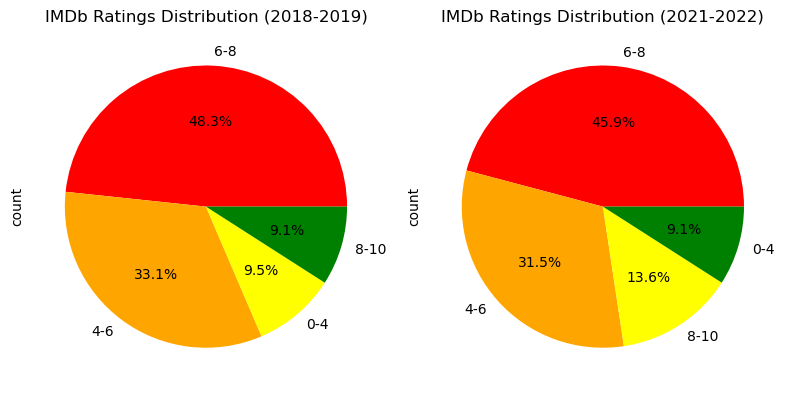

In [47]:
plt.figure(figsize=(8, 8))
ratings_2018_2019 = pd.cut(movies_2018_2019['averageRating'], bins=[0, 4, 6, 8, 10], labels=['0-4', '4-6', '6-8', '8-10']).value_counts()
ratings_2021_2022 = pd.cut(movies_2021_2022['averageRating'], bins=[0, 4, 6, 8, 10], labels=['0-4', '4-6', '6-8', '8-10']).value_counts()

plt.subplot(1, 2, 1)
ratings_2018_2019.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'orange', 'yellow', 'green'])
plt.title('IMDb Ratings Distribution (2018-2019)')

plt.subplot(1, 2, 2)
ratings_2021_2022.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'orange', 'yellow', 'green'])
plt.title('IMDb Ratings Distribution (2021-2022)')

plt.tight_layout()
plt.show()

### Observations:
- The majority of movies in both periods fall within the **6-8** rating category, indicating a general trend towards average to above-average ratings.
- The **8-10** rating category holds a smaller share, reflecting that only a few movies achieve the highest IMDb ratings.
- **0-4** ratings, representing poorly rated movies, are minimal in both periods.
- Comparing both periods, the distribution remains relatively stable, with slight fluctuations in the proportion of movies in the **6-8** and **8-10** categories. But the percentage of movies with higher ratings **(8-10)** is significantly higher during 2021-22 compared to 2018-19.

<!-- slide -->
## Comparative Analysis of Average Ratings by Genre (2018-2019 vs 2021-2022)

**a. Filter by Time Periods**

In [51]:
# fragment
movies_2018_2019 = merged_data_clean[(merged_data_clean['startYear'] >= 2018) & (merged_data_clean['startYear'] <= 2019)]
movies_2021_2022 = merged_data_clean[(merged_data_clean['startYear'] >= 2021) & (merged_data_clean['startYear'] <= 2022)]

<!-- fragment -->
**b. Genre grouping to Calculate Average Ratings** : 

In [54]:
# fragment
movies_2018_2019_exploded = movies_2018_2019.explode('genres')
movies_2021_2022_exploded = movies_2021_2022.explode('genres')

genre_rating_2018_2019 = movies_2018_2019_exploded.groupby('genres')['averageRating'].mean()
genre_rating_2021_2022 = movies_2021_2022_exploded.groupby('genres')['averageRating'].mean()

In [68]:
movies_2021_2022_exploded[movies_2021_2022_exploded.primaryTitle == 'Santa Camp'].head(100)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
226239,tt22748100,movie,Santa Camp,Santa Camp,0,2022,\N,92,Documentary,6.5,832
226239,tt22748100,movie,Santa Camp,Santa Camp,0,2022,\N,92,Reality-TV,6.5,832


<!-- slide -->
**c. Visualization** : 

**i. Bar Plot : Average Movie Ratings by Genre (2018-2019 vs 2021-2022)** 

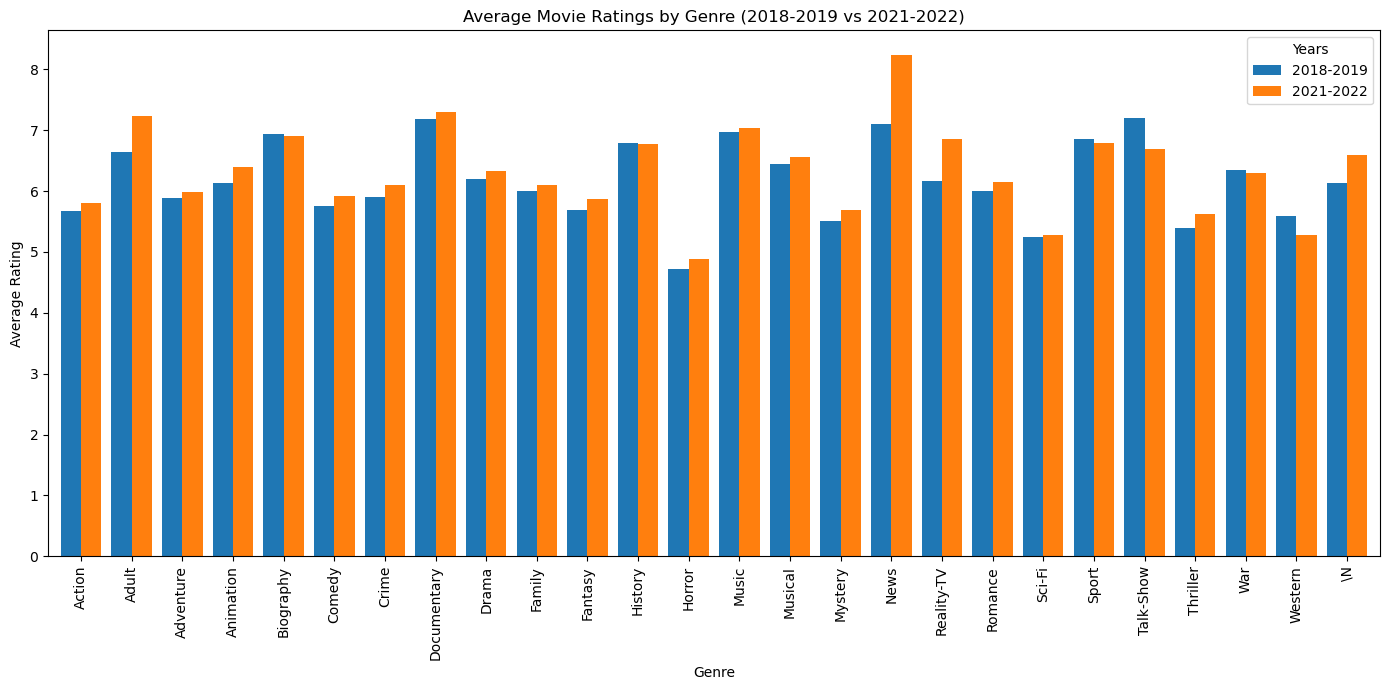

In [262]:
# fragment
comparison_df = pd.DataFrame({
    '2018-2019': genre_rating_2018_2019,
    '2021-2022': genre_rating_2021_2022
})

comparison_df.plot(kind='bar', figsize=(14, 7), width=0.8)
plt.title('Average Movie Ratings by Genre (2018-2019 vs 2021-2022)')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.legend(title='Years')
plt.tight_layout()
plt.show()


<!-- slide -->
**ii. Line Plot: Trend of Movie Ratings by Genre** : 

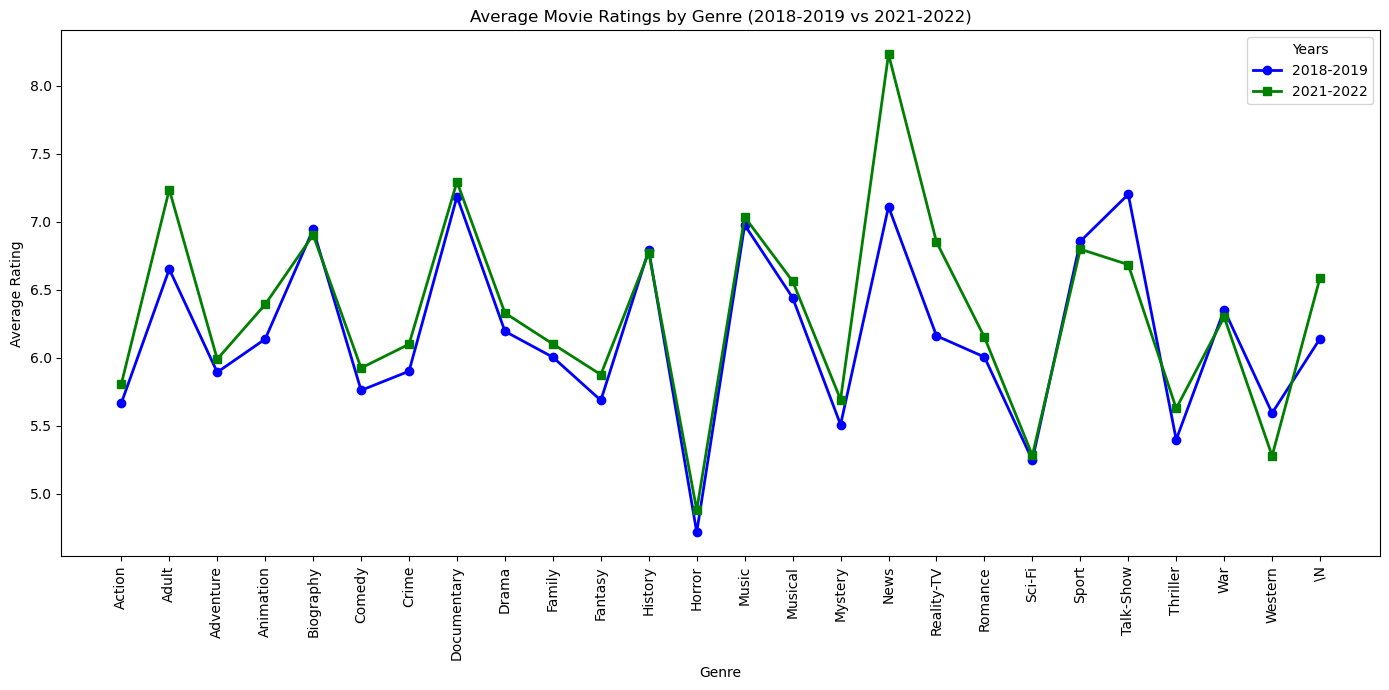

In [265]:
# fragment
plt.figure(figsize=(14, 7))
plt.plot(comparison_df.index, comparison_df['2018-2019'], marker='o', label='2018-2019', color='blue', linewidth=2)
plt.plot(comparison_df.index, comparison_df['2021-2022'], marker='s', label='2021-2022', color='green', linewidth=2)
plt.title('Average Movie Ratings by Genre (2018-2019 vs 2021-2022)')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.legend(title='Years')
plt.tight_layout()
plt.show()

<!-- slide -->
## Key Observations:
Overall ratings stability: Most genres show relatively stable ratings between the two periods. There's no drastic difference in the average rating for any particular genre.

### Genres with Increasing Ratings (2018-2019 vs 2021-2022):

- *Adult*, *Reality-TV* and *News* showed significant improvements in average ratings.

- *Action*, *Adventure*, *Animation*, *Fantasy* and *Romance* along with majority of genres displayed slight improvement in ratings.

### Genres with decreasing ratings:

*Western* and *Talk-Show* saw notable declines in ratings during 2021-2022 compared to 2018-2019.
*History* and *Sport* show minor decreases in ratings.

### Genres with little or no change:

*Sci-Fi* exhibit minimal change between the two periods.

### Consistently High-Rated Genres:

*Music, News* and *Documentary* genres consistently received the highest average ratings.

### Consistently Low-Rated Genres:

*Horror, Sci-Fi* and *Western* genres had the lowest average ratings across both periods, typically around 5-6.


## Comparative Analysis of Number of titles by region (2018-2019 vs 2021-2022)

### Loading Datasets
We first load the required datasets using pandas. The datasets *title.basics.tsv.gz* and *title.akas.tsv.gz* contain information about movies, including their titles, release years, and regions.

In [36]:
title_basics = pd.read_csv('title.basics.tsv.gz', sep='\t', dtype=str)
title_akas = pd.read_csv('title.akas.tsv.gz', sep='\t', dtype=str)


### Filtering for Specific Time Periods
Next, we filter the movies from two time periods: 2018-2019 and 2021-2022. This allows us to compare how the number of movies has changed over time.

In [37]:
movies_2018_2019 = title_basics[(title_basics['titleType'] == 'movie') & (title_basics['startYear'].isin(['2018', '2019']))]
movies_2021_2022 = title_basics[(title_basics['titleType'] == 'movie') & (title_basics['startYear'].isin(['2021', '2022']))]

### Merging Datasets
We merge the title_basics dataset with the title_akas dataset to incorporate regional data, allowing us to group movies by region. We merge on the common keys 'tconst' and 'titleId'.

In [38]:
merged_2018_2019 = pd.merge(movies_2018_2019[['tconst', 'startYear']], title_akas, left_on='tconst', right_on='titleId', how='inner')
merged_2021_2022 = pd.merge(movies_2021_2022[['tconst', 'startYear']], title_akas, left_on='tconst', right_on='titleId', how='inner')

### Cleaning the Data
To ensure accuracy, we clean the data by removing rows with missing or irrelevant regional data (e.g., \N and XWW).

In [39]:
merged_2018_2019_clean = merged_2018_2019[~merged_2018_2019['region'].isin(['\\N', 'XWW'])]
merged_2021_2022_clean = merged_2021_2022[~merged_2021_2022['region'].isin(['\\N', 'XWW'])]

### Grouping Data by Region
We group the movies by region and count the number of movies per region for both time periods (2018-2019 and 2021-2022).

In [40]:
movies_by_region_2018_2019 = merged_2018_2019_clean.groupby('region')['tconst'].count().reset_index()
movies_by_region_2021_2022 = merged_2021_2022_clean.groupby('region')['tconst'].count().reset_index()

movies_by_region_2018_2019.columns = ['Region', 'Number of Movies (2018-2019)']
movies_by_region_2021_2022.columns = ['Region', 'Number of Movies (2021-2022)']

### Filtering Regions with Significant Number of Movies
We focus on regions that produced at least 5,000 movies in either time period. This helps us highlight regions with significant movie production activity.

In [44]:
movies_by_region_combined = pd.merge(movies_by_region_2018_2019, movies_by_region_2021_2022, on='Region', how='inner')

movies_by_region_filtered = movies_by_region_combined[
    (movies_by_region_combined['Number of Movies (2018-2019)'] >= 5000) | 
    (movies_by_region_combined['Number of Movies (2021-2022)'] >= 5000)
]

### Visualizing the Data
Finally, we use matplotlib to create a horizontal bar plot showing the number of movies produced in each region for both time periods. The bars are color-coded to differentiate between 2018-2019 and 2021-2022.

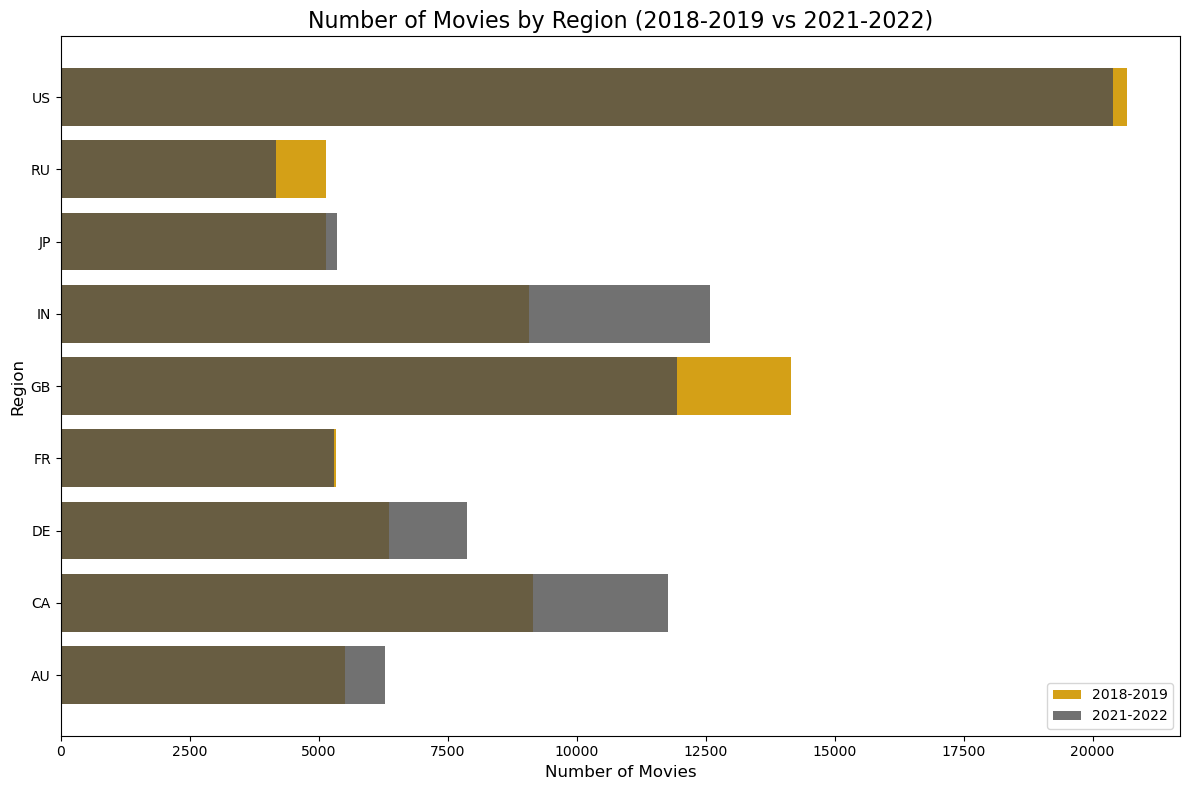

In [46]:
plt.figure(figsize=(12, 8))

plt.barh(movies_by_region_filtered['Region'], movies_by_region_filtered['Number of Movies (2018-2019)'], color='#d4a017', label='2018-2019')

plt.barh(movies_by_region_filtered['Region'], movies_by_region_filtered['Number of Movies (2021-2022)'], color='#4D4D4D', alpha=0.8, label='2021-2022')

plt.title('Number of Movies by Region (2018-2019 vs 2021-2022)', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Region', fontsize=12)

plt.legend()

plt.tight_layout()
plt.show()


### Insights from the Plot:
- The United States(US) leads by a significant margin in movie production for both time periods.
- Russia(RU), the United Kingdom(GB) and even United States(US) show a noticeable decline in the number of movies produced between 2018-2019 and 2021-2022.
- India(IN), Germany(DE), Australia(AU) and Canada(CA) increase their movie production in the later period. India(IN) and Canada(CA) have significantly increased the production after the pandemic(2021-2022).
- Before the pandemic(2018 - 2019), the United Kingdom(GB) produced more movies while India(IN) has overtaken the United Kingdom(GB) to be in the second place after the pandemeic(2021 - 2022), while United States(US) remains numero uno despite the decrease in production

## Conclusion:

From the analysis, we can conclude that while most genres have maintained stable ratings, several genres have experienced a rise in popularity (based on ratings), likely influenced by increased screen time during the pandemic. The significant rise in ratings for genres like **News** and **Adult** might be attributed to a shift in audience consumption patterns, with adults spending more time in front of screens. Conversely, the decline in ratings for **History** and **Sport** genres could be linked to production constraints during the pandemic.

Additionally, the overall movie production landscape has seen notable shifts. The **United States(US)** remains the leading producer of films, although it shows a decline in production between 2021-2022 compared to 2018-2019. Regions like **Russia(RU)** and the **United Kingdom(GB)** also exhibit a decline in movie production. On the other hand, countries like **India(IN)**, **Germany(DE)**, **Australia(AU)**, and **Canada(CA)** have increased production, with **India** surpassing the **United Kingdom** post-pandemic, taking the second place in movie production. Despite the global disruptions caused by the pandemic, many regions have adapted and even ramped up their production capacities.